# Data Exploration

## Imports 

In [3]:
import pandas as pd
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Import the clean CSV

In [4]:
data = pd.read_csv('clean-data.csv')
data.head()

,timestamp,id,latitude,longitude,pollution,traffic_level,wind_speed,pressure,temp
0,2024-05-03 16:21:40.902196,9000000069,51.163864,4.828185,3.842857,62.32,7.20,1026.0,273.02
1,2024-05-03 17:21:40.902196,9000005034,51.130837,4.562922,10.712200,306.04,5.14,1028.0,273.10
2,2024-05-03 18:21:40.902196,9000000837,51.197985,4.478805,4.924336,129.32,7.20,1026.0,273.02
3,2024-05-03 19:21:40.902196,9000006159,51.235718,4.435498,13.448654,380.62,5.14,990.0,282.12
4,2024-05-03 20:21:40.902196,9000001420,51.162048,4.605056,3.481111,0.00,4.63,1027.0,272.57


## Descriptive statistics

A descriptive statistic is a summary statistic that describes or summarizes features dataframe.

In [5]:
statistics = data.drop(columns=['id', 'timestamp']).describe() 
round(statistics, 2) 

,latitude,longitude,pollution,traffic_level,wind_speed,pressure,temp
count,30997.00,30997.00,30997.00,30997.00,30997.00,30997.00,30997.00
mean,51.20,4.55,20.80,142.51,15.88,997.58,273.20
std,0.10,0.67,49.23,213.51,100.95,124.92,27.55
min,51.00,0.73,0.00,0.00,0.00,0.00,0.00
25%,51.15,4.42,5.26,0.00,3.66,998.00,271.86
50%,51.19,4.48,8.09,75.53,5.66,1021.00,274.21
75%,51.29,4.59,14.26,198.40,7.20,1030.00,280.45
max,51.46,26.11,977.00,14800.60,1035.00,1035.00,285.26


## Correlation analysis

Perform a correlation analysis between the target variable and the other variables to identify significant relationships.

A positive correlation is a relationship between two variables that tend to move in the same direction. A positive correlation exists when one variable tends to decrease as the other variable decreases, or one variable tends to increase when the other increases.

A negative, or inverse correlation, between two variables, indicates that one variable increases while the other decreases, and vice-versa.

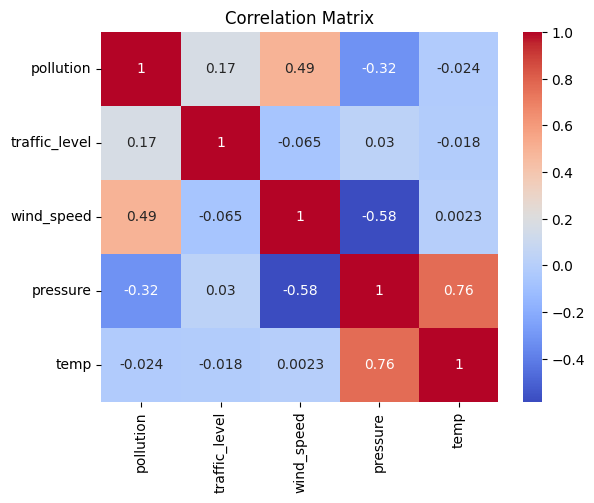

In [6]:
correlations = {}
correlation_df = data.drop(columns=['id','timestamp', 'latitude', 'longitude']) 

for column in correlation_df.columns:
    if column != 'pollution':
        corr, _ = pearsonr(correlation_df['pollution'], correlation_df[column])
        correlations[column] = corr

sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on these results, the most influential variables for predicting the pollution are the pressure and wind speed.

## Evolution of data over time

Text(0, 0.5, 'Pollution')

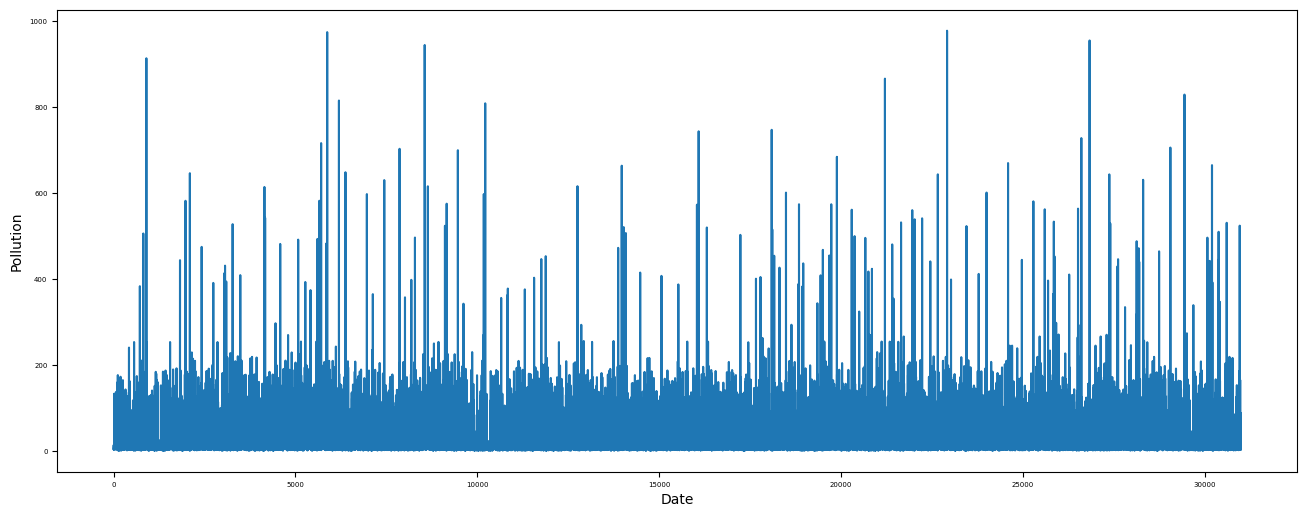

In [8]:
data["pollution"].plot(figsize=(16, 6), fontsize=5)
plt.xlabel("Date")
plt.ylabel("Pollution")

Text(0, 0.5, 'Traffic Level')

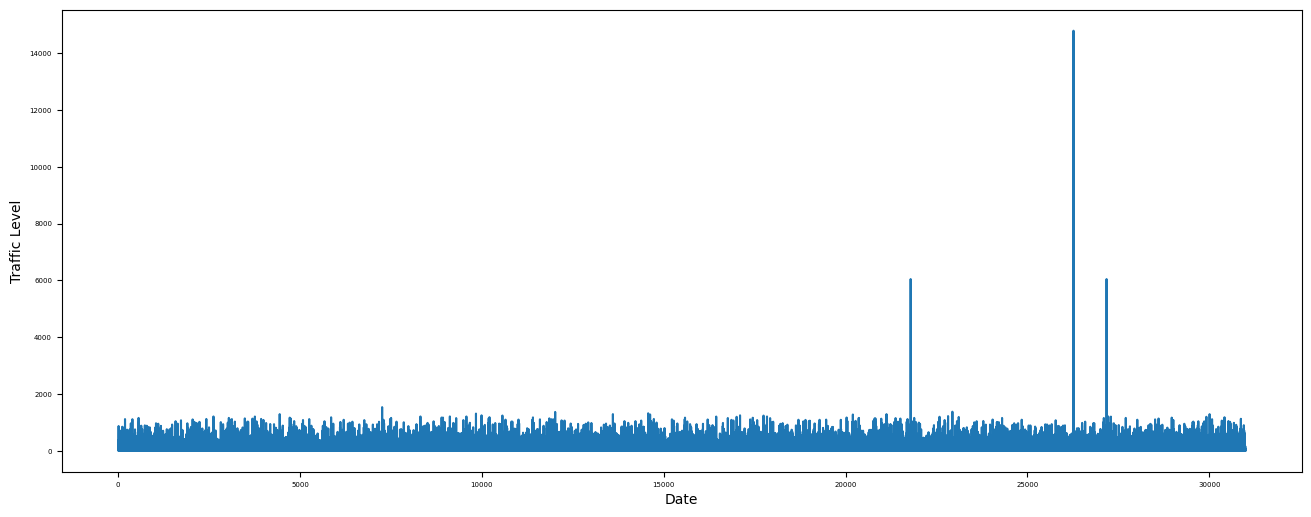

In [10]:
data["traffic_level"].plot(figsize=(16, 6), fontsize=5)
plt.xlabel("Date")
plt.ylabel("Traffic Level")

Text(0, 0.5, 'Wind Speed')

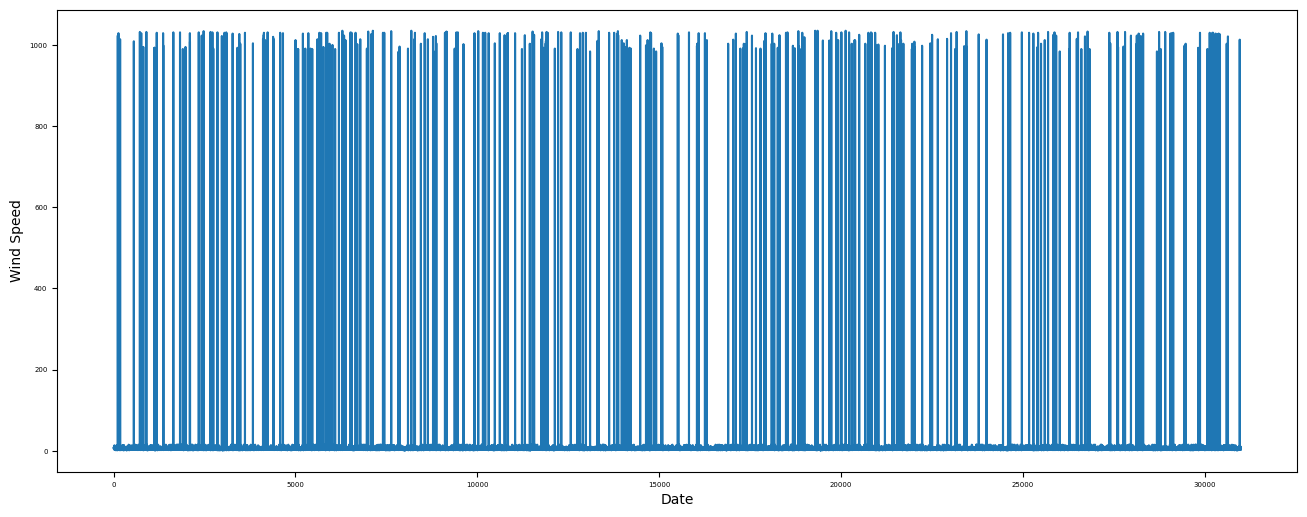

In [11]:
data["wind_speed"].plot(figsize=(16, 6), fontsize=5)
plt.xlabel("Date")
plt.ylabel("Wind Speed")

## Distribution plots

A Dispersion Plot, also known as a Distplot, depicts the variance in the original dataset. 

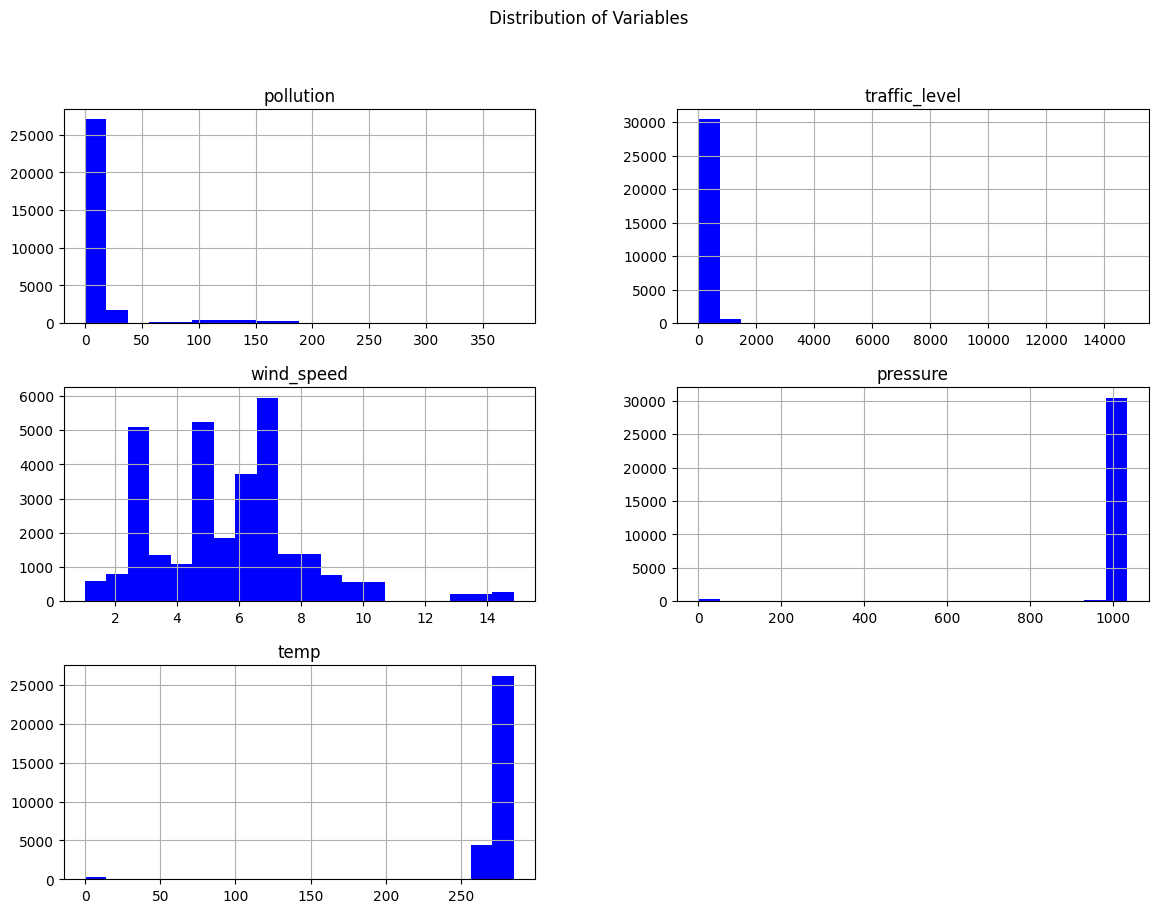

In [ ]:
data.drop(columns=['id', 'latitude', 'longitude']).hist(figsize=(14, 10), bins=20, color='blue')
plt.suptitle('Distribution of Variables')
plt.show()

## Seasonal decompose

The *trend component* help us to see the evolution of data over time: if it's increasing, decreasing, or consistent over the days. It seems that the pollution is somewhat consistent, and has a few spikes.

The *seasonal component* helps pick up any patters in the data.

The *residual component* represent the any unusual or unexpected values within the data. 


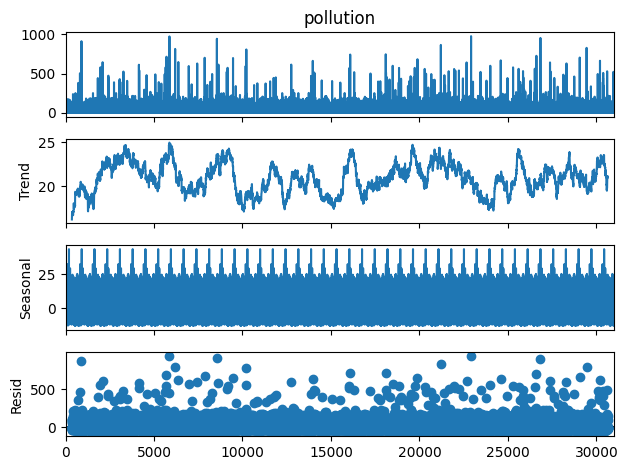

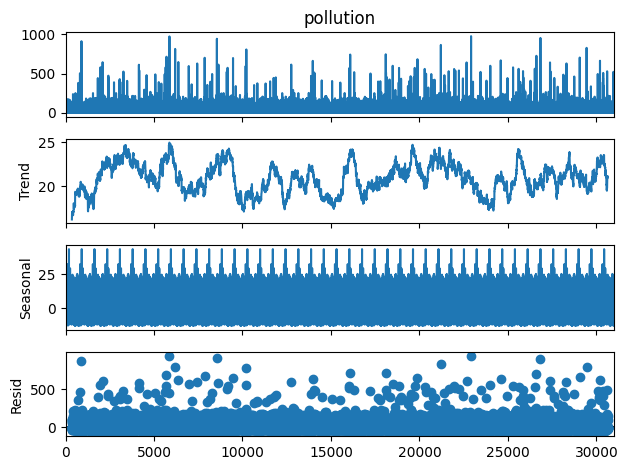

In [12]:
results = seasonal_decompose(data['pollution'], period=720) # One month period
results.plot()